# Case 1: Heart Disease
**05.02.2021**<br>
Andrey Verbovskiy<br>
Neural Networks for Health Technology Applications<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The objective of this case study is to utilize tensorflow and keras libraries to create a Dense Neural Network for determining whether or not a patient has heart disease. The main aim was to experiment with different model architectures, optimizers, loss functions, metrics, and training settings to optimize a model for binary classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers.experimental import preprocessing

## 2. Dataset

The dataset used in this case study was collected from V.A. Medical Center, Long Beach and Cleveland Clinic Foundation by Dr. Robert Detrano. This dataset contained the least amound of missing values, allowing for a more complete model to be built.

In [2]:
inputfile = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnose']
df = pd.read_csv(inputfile, index_col = None, header = None, names = colnames, na_values = '?')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### Data Headers

*age* : age in years<br>
*sex* : male (1) or female (0)<br>
*cp* : chest pain type<br>
    - 1 = typical angina<br>
    - 2 = atypical angina<br>
    - 3 = non-anginal pain<br>
    - 4 = asymptomatic<br>
*trestbps* : resting blood pressure in mmHg, upon admission<br>
*chol* : serum cholesterol, mg/dl<br>
*fbs* : fasting blood sugar, if > 120mg/dl, then 1, else 0<br>
*restecg* : resting electrocardiographic results<br>
*thalach* : max heart rate<br>
*exang* : exercise induced angina (chest pain), 1 if true, else 0<br>
*oldpeak* : ST depression, induced by exercise, compared to rest<br>
*slope* : slope of peak exercise in ST segment<br>
*ca* : number of major vessels coloured by flouroscopy (0 - 3)<br>
*thal* : normal = 3, 6 = fixed defect, 7 = reversible defect<br>
*diagnose* : no heart disease = 0, heart disease > 0

### Data Types of the Dataframe

In [3]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
diagnose      int64
dtype: object

### Descriptive Statistics

In [4]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,301.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


## 3. Preprocessing

### Handling missing values

**Checking to see if the data has any missing values**

The following rows contain at least one missing value:

In [5]:
df[df.isna().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Replace all missing values with the mean

In [6]:
df = df.fillna(df.mean())
# Because there are only a few missing values, they could also be dropped completely without changing the overall data

Double checking that all missing values have been accounted for

In [7]:
df[df.isna().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose


### Converting diagnosis values to binary values

Because this is a binary classification model, we are converting the diagnosis of > 0 from a value from 1 - 3 to 1, where 0 is healthy and 1 is heart disease. At this moment, we are not interested in the type of heart disease found in the patient, if any, only if they have it or not.

In [8]:
df['diagnose'] = df['diagnose'].replace([1, 2, 3], 1)
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### Correlation Coefficients of the Dataset

In [9]:
corr = df.corr().round(2)
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
age,1.00,-0.10,0.10,0.28,0.21,0.12,0.15,-0.39,0.09,0.20,0.16,0.36,0.13,0.21
sex,-0.10,1.00,0.01,-0.06,-0.20,0.05,0.02,-0.05,0.15,0.10,0.04,0.09,0.38,0.21
cp,0.10,0.01,1.00,-0.04,0.07,-0.04,0.07,-0.33,0.38,0.20,0.15,0.23,0.26,0.32
trestbps,0.28,-0.06,-0.04,1.00,0.13,0.18,0.15,-0.05,0.06,0.19,0.12,0.10,0.13,0.15
chol,0.21,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.05,-0.00,0.12,0.01,0.07
fbs,0.12,0.05,-0.04,0.18,0.01,1.00,0.07,-0.01,0.03,0.01,0.06,0.14,0.07,-0.02
restecg,0.15,0.02,0.07,0.15,0.17,0.07,1.00,-0.08,0.08,0.11,0.13,0.13,0.02,0.19
thalach,-0.39,-0.05,-0.33,-0.05,-0.00,-0.01,-0.08,1.00,-0.38,-0.34,-0.39,-0.26,-0.28,-0.30
exang,0.09,0.15,0.38,0.06,0.06,0.03,0.08,-0.38,1.00,0.29,0.26,0.14,0.33,0.29
oldpeak,0.20,0.10,0.20,0.19,0.05,0.01,0.11,-0.34,0.29,1.00,0.58,0.29,0.34,0.41


### Correlation Matrix

<AxesSubplot:>

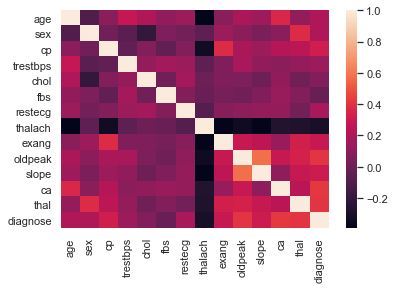

In [10]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Here we can see some correlations between the different data points. Thalach (maximum heart rate) seems to have the largest number of negative correlations with the different data points, for example.

### Split dataset into train and test sets

In [11]:
train_dataset = df.sample(frac = 0.8, random_state = 0)
test_dataset = df.drop(train_dataset.index)

### Separate features and labels

In [12]:
# Separate the features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Pop takes out the labels
train_labels = train_features.pop('diagnose')
test_labels = test_features.pop('diagnose')

### Normalize features

In [13]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

## 4. Modeling

For the model, I ended up with 4 total layers, one of which is the normalizer. I chose the activation function 'ReLU' for the hidden layers, as that gave me the most consistent output, and it seemed the most relevant for this dataset.

The loss function of 'mean_absolute_error' was chosen after trials with 'binary_crossentropy' gave negative loss values and a very random-looking accuracy graph. The same was the case for the optimizer 'adam', previously I had tested 'rmsprop', which, while giving somewhat passable values, still resulted in negative loss numbers and a lower accuracy rate.

The metrics 'binary_accuracy' was used from the beginning, but we switched to simple 'accuracy', as it made more sense to see overall accuracy of the model.

In [14]:
model = Sequential([
      normalizer,
      layers.Dense(64, activation = 'relu'),
      layers.Dense(16, activation = 'relu'),
      layers.Dense(1, activation = 'sigmoid')])

model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,980
Trainable params: 1,953
Non-trainable params: 27
_________________________________________________________________


## 5. Training

Here, I tested multiple different iterations of batch sizes and epochs. The number of epochs only narrowed the data on the graph, but the batch sizes seemed to have the greatest effect. The larger the batch size, the more underfitted the results seemed to be. I tested epochs of 20-200, and batch sizes of 16 - 256. 32 batches gave a decent accuracy outcome, so that's the value we chose. A higher batch size resulted in the data being too underfitted.

I ended up using 65 epochs, which was my starting point. From the verbose data, the accuracy starts leveling off after about 65 epochs, so using up to 100 was wasted effort for this study.

In [15]:
%%time
E = 65
B = 32
h = model.fit(train_features, train_labels,
                   epochs = E,
                   batch_size = B,
                   verbose = 0,
                   validation_split = 0.2)

Wall time: 2.87 s


## 6. Evaluation and performance

In [16]:
h_dict = h.history
h_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot of the Training and Validation loss

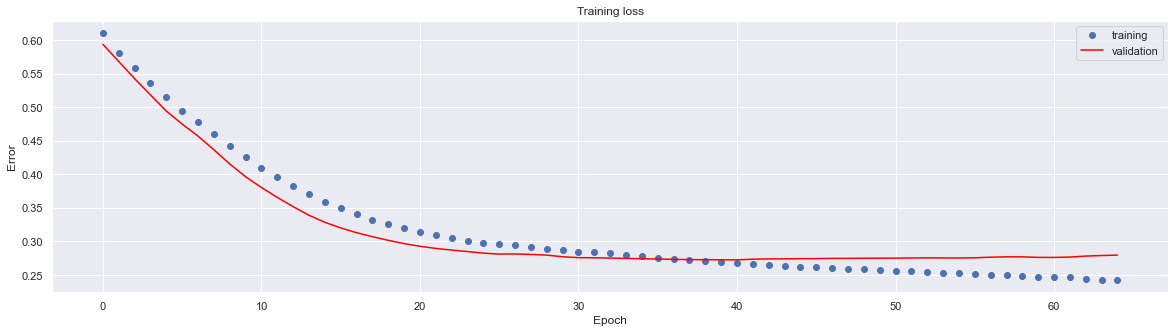

In [17]:
plt.figure(figsize = (20, 5))
plt.plot(h.history['loss'], 'bo', label = 'training')
plt.plot(h.history['val_loss'], 'red', label = 'validation')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
    
plt.show()

### Plot of the Training and Validation Accuracy

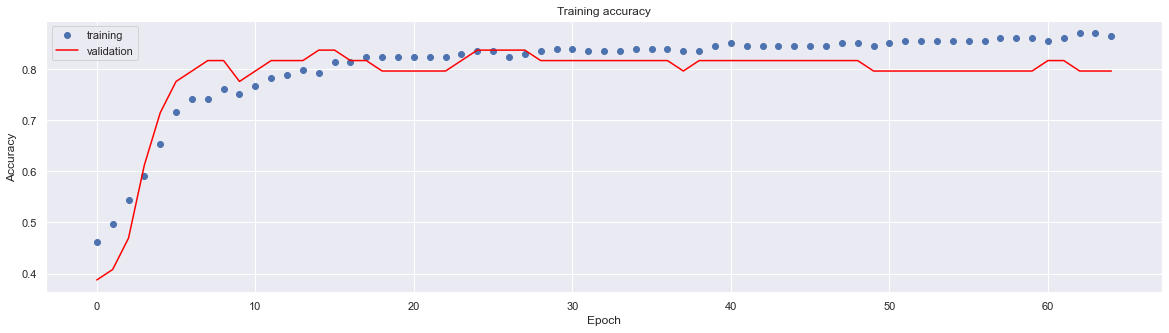

In [18]:
plt.figure(figsize = (20, 5))
plt.plot(h.history['accuracy'], 'bo', label = 'training')
plt.plot(h.history['val_accuracy'], 'red', label = 'validation')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

### Performance Evaluation

Most of the results I received here were between 80-83% accuracy, usually around the 80% range, which is a fairly decent result given the nature of heart disease and the size of the dataset. With more data manipulation and more information, perhaps the score could have been higher.

In [19]:
test_results = model.evaluate(test_features, test_labels, verbose=0)
test_results

[0.2921120524406433, 0.8360655903816223]

## 7. Conclusions

For this case study, I investigated multiple viewpoints and combinations for the end result, and, with a overall accuracy result of about 80%, I feel that I managed this well within the limits of the dataset.

My final model has two hidden layers, one with 64 elements and another with 8 elements, utilizing the rectified linear unit (ReLU) activation function. The first layer is simply the normalized data layer, and the last layer has one element and the Sigmoid activation function.

The number of epochs in the final model is 65, and the batch size is 32. These gave the best outcomes in terms of size and accuracy of the model, as the accuracy did not really increase with additional epochs.

Finally, there are multiple ways this case study could be polished and improved further. First, with more rows of complete data, the accuracy could be fine-tuned to a much higher degree. The dataset used here had very few missing values, but there weren't very many samples (only 303) to create a model with. Additionally, testing every batch and epoch value alongside various activation and loss functions, as well as optimizers, may have produced a more accurate result. But, as previously stated, an accuracy of about 80% was a decent result for a dataset this small, and running through all of the combinations would have taken significantly more time than necessary.